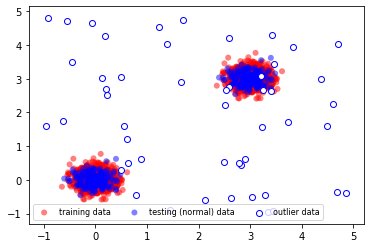

In [92]:
"""
souce: https://towardsdatascience.com/outlier-detection-with-isolation-forest-3d190448d45e
source2: https://towardsdatascience.com/outlier-detection-with-extended-isolation-forest-1e248a3fe97b
Topic: Outlier Detection with Isolation Fores
Author: Eryk Lewinson
Data Access: 9/24/19
"""
# Step 1: visualize 2-D data with outliner

# importing libaries ---
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from pylab import savefig 
from sklearn.ensemble import IsolationForest 

# import just in case
from sklearn import datasets

# Generating data ---
rng = np.random.RandomState(42) 
## similar to np.randsom.seed(42), but effect all 'np' function
## RandomState(42) makes the random function result repeatable

# Generating training data 
X_train00 = 0.2 * rng.randn(1000, 2) # n=1000 and 2 column(x1,x2)
X_train0 = np.r_[X_train00 + 3, X_train00] 
# addition data (n=1000 around 0) (n=1000 around 3)
X_train = pd.DataFrame(X_train0, columns = ['x1', 'x2']) 
## 'x1,x2' is column name

# Generating new, 'normal' observation 
X_test00 = 0.2 * rng.randn(200, 2) # array
X_test0 = np.r_[X_test00 + 3, X_test00] # array
X_test = pd.DataFrame(X_test0, columns = ['x1', 'x2'])

# Generating outliers 
X_outliers0 = rng.uniform(low=-1, high=5, size=(50, 2)) 
X_outliers = pd.DataFrame(X_outliers0,columns = ['x1', 'x2'])

# Example of data frame plot 
#(https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html)
Xtrain = plt.scatter(X_train0[:,0],X_train0[:,1],
                     c='red',alpha=0.5,edgecolors='none')
Xtest=plt.scatter(X_test0[:,0],X_test0[:,1],c='blue',
                  alpha=0.5,edgecolors='none')
Xoutlier=plt.scatter(X_outliers0[:,0],X_outliers0[:,1],
                     c='white',marker='o',alpha=1,edgecolors='blue')

plt.legend((Xtrain,Xtest,Xoutlier),
           ('training data','testing (normal) data','outlier data'),
           scatterpoints=1,
           loc='lower left',
           ncol=3,
           fontsize=8)
plt.show()


In [93]:
# Step 2: training data
# Goal: to train the model that 
#   ...X_test is normal and X_outlier is not normal

# Isolation Forest ---
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html

# training the model 
clf = IsolationForest(max_samples=100, random_state=rng) 
clf.fit(X_train) 
print(clf)

# predictions 
y_pred_train = clf.predict(X_train) # self compare ->all get '1' = normal 
y_pred_test = clf.predict(X_test) # some get -1 (outlier prediction)
y_pred_outliers = clf.predict(X_outliers)


/home/mailinux/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:237: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
/home/mailinux/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/home/mailinux/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)
/home/mailinux/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


IsolationForest(behaviour='old', bootstrap=False, contamination='legacy',
                max_features=1.0, max_samples=100, n_estimators=100,
                n_jobs=None,
                random_state=<mtrand.RandomState object at 0x7f06a32dfa20>,
                verbose=0, warm_start=False)


/home/mailinux/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


In [99]:
# Step 3: evaluate the model

# new, 'normal' observations ---
print("Normal Prediction Accuracy:", 
      list(y_pred_test).count(1)/y_pred_test.shape[0]) 
## (y_pred_test).count(1) = number of prediction '1' normal
## y_pred_test.shape[0] = number of tot testing sample

# outliers ---
print("Outliner Prediction Accuracy:", 
      list(y_pred_outliers).count(-1)/y_pred_outliers.shape[0]) 
## (y_pred_outliers).count(-1) = number of prediction '-1' abnormal
## y_pred_outliers.shape[0] = number of tot outlining sample

# Q: why can't we get 1.00 accuracy?
# A: Some of the generated outliers in this experiment is in training data region

Normal Prediction Accuracy: 0.93
Outliner Prediction Accuracy: 0.96


In [100]:
# Step 4: redesign the outliers and try it again

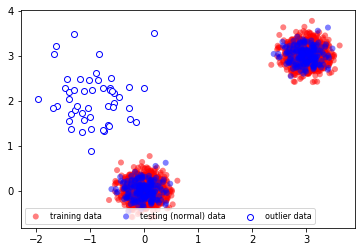

In [121]:
# Generating data ---
rng = np.random.RandomState(42) 
## similar to np.randsom.seed(42), but effect all 'np' function
## RandomState(42) makes the random function result repeatable

# Generating training data 
X_train00 = 0.2 * rng.randn(1000, 2) 
X_train0 = np.r_[X_train00 + 3, X_train00]
X_train = pd.DataFrame(X_train0, columns = ['x1', 'x2']) 
## 'x1,x2' is column name

# Generating new, 'normal' observation 
X_test00 = 0.2 * rng.randn(200, 2) # array
X_test0 = np.r_[X_test00 + 3, X_test00] # array
X_test = pd.DataFrame(X_test0, columns = ['x1', 'x2'])

# Generating outliers 
X_test000 = 0.5 * rng.randn(50) # array

X_test0 = np.r_[X_test00 + 3, X_test00] # array
X_outliers= pd.DataFrame(X_test0, columns = ['x1', 'x2'])

X_outliers_x=0.5 * rng.randn(50)-1
X_outliers_y=0.5 * rng.randn(50)+2
X_outliers0 = np.vstack((X_outliers_x,X_outliers_y)).T
X_outliers = pd.DataFrame(X_outliers0,columns = ['x1', 'x2'])

# Example of data frame plot 
#(https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html)
Xtrain = plt.scatter(X_train0[:,0],X_train0[:,1],
                     c='red',alpha=0.5,edgecolors='none')
Xtest=plt.scatter(X_test0[:,0],X_test0[:,1],c='blue',
                  alpha=0.5,edgecolors='none')
Xoutlier=plt.scatter(X_outliers0[:,0],X_outliers0[:,1],
                     c='white',marker='o',alpha=1,edgecolors='blue')

plt.legend((Xtrain,Xtest,Xoutlier),
           ('training data','testing (normal) data','outlier data'),
           scatterpoints=1,
           loc='lower left',
           ncol=3,
           fontsize=8)
plt.show()


In [122]:
# Isolation Forest ---
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html

# training the model 
clf = IsolationForest(max_samples=100, random_state=rng) 
clf.fit(X_train) 
print(clf)

# predictions 
y_pred_train = clf.predict(X_train) # self compare ->all get '1' = normal 
y_pred_test = clf.predict(X_test) # some get -1 (outlier prediction)
y_pred_outliers = clf.predict(X_outliers)

/home/mailinux/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:237: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
/home/mailinux/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/home/mailinux/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)
/home/mailinux/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


IsolationForest(behaviour='old', bootstrap=False, contamination='legacy',
                max_features=1.0, max_samples=100, n_estimators=100,
                n_jobs=None,
                random_state=<mtrand.RandomState object at 0x7f06a34865e8>,
                verbose=0, warm_start=False)


/home/mailinux/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


In [123]:
# evaluation

print("Normal Prediction Accuracy:", 
      list(y_pred_test).count(1)/y_pred_test.shape[0]) 
## (y_pred_test).count(1) = number of prediction '1' normal
## y_pred_test.shape[0] = number of tot testing sample

# outliers ---
print("Outliner Prediction Accuracy:", 
      list(y_pred_outliers).count(-1)/y_pred_outliers.shape[0]) 

Normal Prediction Accuracy: 0.9225
Outliner Prediction Accuracy: 1.0


In [ ]:
## 